## Stata basics
### Printing in Stata

The print command for Stata is the `display` or `di` command. Let's start by printing a familiar message:

In [1]:
di "Hello World!"

Hello World!


### Help

The most important Stata command is the `help` command. It searches the Stata documentation for the user input. Since this instance uses the `stata_kernel` for Jupyter Lab, we'll need to include `%` to the start of the command:

In [2]:
%help help

This front-end cannot display HTML help.

### Macros and scalars

Stata has two types of "variables" called local and global macros (not to be confused with actual Stata variables). Local macros are saved in memory until the end of the current do-file or Stata instance. Global macros are saved until you exit Stata.

Let’s start by saving your working directory with macros. Create a folder called `ECON-C4100` somewhere on your computer and copy the path to Stata:

In [3]:
local userPath "Z:/ECON-C4100"
global userPath "Z:/ECON-C4100"

Macros are referenced with `` `localName' `` and ` $globalName `. We can print them by typing:

In [4]:
di "`userPath'"
di "$userPath"


Z:/ECON-C4100



Z:/ECON-C4100


One crucial thing about statistical programming is to know which folder your working directory is pointing at. Let's set our working dir to `$userPath`:

In [5]:
cd $userPath

Z:\ECON-C4100


You can print the location of the current working directory with two commands:

In [6]:
pwd
cd


Z:\ECON-C4100



Z:\ECON-C4100


To print the Stata system directories you can type:

In [7]:
sysdir

   STATA:  C:\Program Files (x86)\Stata15MP\


    BASE:  C:\Program Files (x86)\Stata15MP\ado\base\


    SITE:  C:\Program Files (x86)\Stata15MP\ado\site\


    PLUS:  c:\ado\plus\


PERSONAL:  c:\ado\personal\


OLDPLACE:  c:\ado\


You can combine macros easily:

In [8]:
local userPathTwice `userPath' $userPath $userPath
di "`userPathTwice'"



Z:/ECON-C4100 Z:/ECON-C4100 Z:/ECON-C4100


You can also erase macros by simply typing:

In [9]:
local userPathTwice
di "`userPathTwice'"

Macros can be used as counters:

In [10]:
local one_ 1
local two_ 2
local three_ `one_' + `two_'

In [11]:
di `three_'

3


However notice who `""` change the output:

In [12]:
di "`three_'"

1 + 2


You can also use scalars. They are refered with their names but can only store numbers:

In [13]:
scalar one_ = 1
scalar two_ = 2
scalar three_ = one_ + two_

In [14]:
di three_
scalar drop three_


3


### Commenting and line breaks in Stata

Including comments to your code is easy:

In [15]:
// Comment, one line
* Comment, one line

/* Comment, 
multiple 
lines */

The default chracter that marks the end of a command is newline (line break). You can change it to `;` and back easily:

In [16]:
#delimit ;
#delimit cr

When using the standard line break, we need to use `///` to tell Stata if our command is presented in multiple lines.

### Importing data to Stata

Next I demonstrate on how to import text and Excel data to Stata. We obtain our data directly through Statistics Finland API (I’ve created the links beforehand). We could also download the data to disk and replace the address with the file path. More on that later... 

In [17]:
local delimiter "tab" // our data has 'tabulate' key as the delimiter.
import delimited using ///
https://pxnet2.stat.fi:443/PXWeb/sq/2c23b351-c9a5-4946-b9c1-06c8146e7119 , ///
delimiter(`delimiter') clear



(3 vars, 191 obs)


Let's describe our data in memory:

In [18]:
describe _all


              storage   display    value


variable name   type    format     label      variable label


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


month           str7    %9s                   Month


commodity       str5    %9s                   Commodity


pointfigure     float   %9.0g                 Point figure


In Stata, the data is saved as variables. Think them as vectors or matrices or as columns.

Notice how the month variable has storage type `str7`. That means it’s a string variable. We can turn it into a time variable that Stata understands:

In [19]:
generate temp = monthly(month, "YM")
drop month
rename temp month
label variable month "Month"

Above, we first generate a new variable with the `generate` or `gen` command. Then we delete the old variable with the `drop` command and rename the variable *temp* back to *month* with the `rename` command.

Finally, we give the new month variable it’s old label.

In [20]:
describe _all


              storage   display    value


variable name   type    format     label      variable label


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


commodity       str5    %9s                   Commodity


pointfigure     float   %9.0g                 Point figure


month           float   %9.0g                 Month


We could also do the same with Excel data. This time Statistics Finland gives us a direct link to an Excel file:

In [21]:
import excel using ///
https://pxnet2.stat.fi/PXWeb/sq/feec4f38-7ddb-4c9f-b091-a0688c3f7b89 , ///
cellrange(A3:F194) firstrow clear

In [22]:
keep A B Pointfigure
rename A month
rename B commodity
generate temp = monthly(month, "YM")
drop month
rename temp month
label variable month "Month"

Excel files are often quite awkward. Notice how we need to determine the precise cellrange or the data would include some unwanted metadata from the Statistics Finland.

Command `keep` is the opposite of `drop`.

Finally, to demonstrate the dynamic options of Stata, let’s do a graph:

### Simple line graphs in Stata

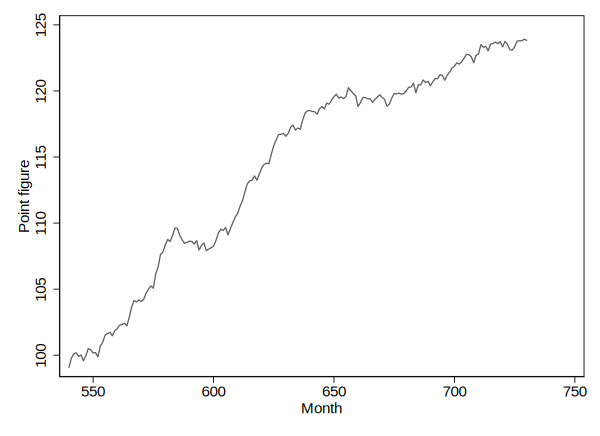

In [23]:
set scheme s1mono // just a style for our graph
line Pointfigure month